In [1]:
import pandas as pd

In [2]:
AllTweets = pd.read_pickle('AllTweets.pkl')

# Independent Chi-square Test

#### Create crosstable

In [3]:
from scipy import stats

In [4]:
tweets_crosstab = pd.crosstab(AllTweets['retweetsR'],AllTweets['username'])
tweets_crosstab

username,HillaryClinton,JoeBiden,realDonaldTrump
retweetsR,,,
0,597,5238,125
1,2629,0,3093


#### Run analysis

In [5]:
stats.chi2_contingency(tweets_crosstab)

(9254.334999349416,
 0.0,
 2,
 array([[1645.86200993, 2672.35747304, 1641.78051703],
        [1580.13799007, 2565.64252696, 1576.21948297]]))

Chi-square: 9254.33
p-value: 0.0

The identity (username) of a candidate has significant influence on the retweet engagement there will be with their tweets. 

Of the three candidates, Biden's tweets are reposted substantially more than either Clinton or Trump. In the 2016 presidential campaign, Clinton was retweeted more frequently than Trump, although for both of them their tweets were more often not retweeted.

# Text clustering with K-means


In [6]:
# Corpus processing
import re
import nltk.corpus

from nltk.corpus                      import stopwords
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from nltk.tokenize                    import RegexpTokenizer
from sklearn.preprocessing            import normalize

# K-means
from sklearn import cluster

### Load data 

Extract 'tweet' column into a list of text for corpus. 

In [7]:
AllTweets1 = AllTweets[['username','tweet']]
AllTweets1.head()

,username,tweet
0,JoeBiden,Donald Trump looks at this violence and sees a...
1,JoeBiden,"Folks, we're just hours away from our first en..."
2,JoeBiden,The truth is Donald Trump can't stop the viole...
3,JoeBiden,Anyone who met Amari will tell you that he was...
4,JoeBiden,More cops have died from COVID this year than ...


### Cluster Analysis

In [8]:
# Visualization and Analysis
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.feature_extraction import text

# Map Visualization
import folium

# import branca.colormap as cm
from branca.element import Figure

#### Vectorization

In [38]:
add = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'@','#','http','com','www','twitter','status','realdonaldtrump','hillaryclinton','https','pic','joebiden','https','like',"alaska", "alabama", "arkansas", "arizona", "california", "colorado", "connecticut", "district ", "columbia", "delaware", "florida", "georgia", "hawaii", "iowa", "idaho", "illinois", "indiana", "kansas", "kentucky", "louisiana", "massachusetts", "maryland", "maine", "michigan", "minnesota", "missouri", "mississippi", "montana", "north", "south","carolina","dakota", "nebraska", "hampshire", "jersey", "nevada", "york", "ohio", "oklahoma", "oregon", "pennsylvania", "puerto rico", "rhode island", "tennessee", "texas", "utah", "virginia", "vermont", "washington", "wisconsin", "west virginia", "wyoming"]
stop_words = text.ENGLISH_STOP_WORDS.union(add)
stop_words

frozenset({'!',
           '"',
           '#',
           '%',
           "'",
           '(',
           ')',
           ',',
           '.',
           ':',
           ';',
           '?',
           '@',
           '[',
           ']',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'alabama',
           'alaska',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'arizona',
           'arkansas',
           'around',
           'as',
 

In [39]:
desc = AllTweets1['tweet'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['district', 'island', 'puerto', 'rhode', 'rico', 'west'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [40]:
word_features = vectorizer.get_feature_names()

#### Stem & tokenize the data

Stemming reduces the word to its root form, or "stem", which may not actually be a real word in itself. Tokenizing separates words from their syntactical context, essentially breaking down sentences into individual words and punctuation. 

In [41]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

Vectorizing the data converts the text into a vector. Here, the stopwords (unnecessary and irrelevant words) are removed, and the data is stemmed and tokenized as well.

In [42]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'arkansa', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'delawar', 'describ', 'district', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'hampshir', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'illinoi', 'inde', 'island', 'kansa', 'kentucki', 'main', 'mani', 'massachusett', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'puerto', 'rhode', 'rico', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'tennesse', 'texa', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'west', 'whatev', 'whenc', 'whenev

18148
["''", "'a", "'i", "'s", "'u", 'aa', 'aab', 'aac', 'aadaro', 'aadb', 'aae', 'aaek', 'aaioyi', 'aan', 'aanhpi', 'aanxirujjd', 'aapi', 'aapqgqbn', 'aarm', 'aaronblak', 'aarp', 'aarpadvoc', 'aarpiowaforum', 'aattabfoxx', 'aauthmw', 'aavftii', 'ab', 'aba', 'abandon', 'abas', 'abb', 'abbi', 'abbierbennett', 'abbott', 'abc', 'abcn', 'abcnetwork', 'abcnew', 'abcpolit', 'abcworldnew', 'abd', 'abdclosdyw', 'abddfd', 'abdeslam', 'abdic', 'abdiurx', 'abdoyx', 'aberdeen', 'abeshinzo', 'abet']


In [43]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'arkansa', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'delawar', 'describ', 'district', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'hampshir', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'illinoi', 'inde', 'island', 'kansa', 'kentucki', 'main', 'mani', 'massachusett', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'puerto', 'rhode', 'rico', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'tennesse', 'texa', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'west', 'whatev', 'whenc', 'whenev

#### Selecting the number of clusters to run for k-means

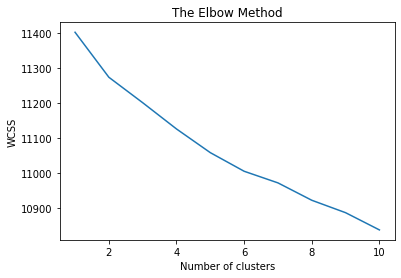

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

The "elbow" is ambiguous, so determining the right amount of clusters to use will have to be done by testing different numbers of them. 

In [44]:
print(words[250:300])

['e', 'earli', 'earn', 'easi', 'easier', 'econom', 'economi', 'ed', 'educ', 'effect', 'effort', 'el', 'elect', 'elimin', 'elizabeth', 'els', 'emerg', 'en', 'end', 'endors', 'energi', 'enforc', 'enjoy', 'ensur', 'entir', 'epidem', 'equal', 'equip', 'es', 'especi', 'est', 'et', 'event', 'everi', 'everybodi', 'everyon', 'everyth', 'exact', 'exampl', 'excit', 'exist', 'existenti', 'expand', 'experi', 'expert', 'extend', 'eye', 'f', 'face', 'facebook']


#### Running k-means and testing the analysis with different numbers of clusters

In [45]:
# 3 Clusters

kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) 
# n_init: number of iterations for clustering
# n_jobs: number of cpu cores to use

kmeans.fit(X3)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : t, trump, hillari, donald, s, make, america, presid, let, join, clinton, vote, peopl, great, say, h, new, american, y, watch, amp, plan, just, famili, w
1 : thank, t, makeamericagreatagain, trump, great, new, americafirst, support, poll, votetrump, america, imwithyou, soon, hampshir, amp, maga, nbcnew, j, trumppenc, u, h, make, everyon, love, amaz
2 : s, presid, trump, american, biden, peopl, make, need, america, donald, hillari, vp, day, countri, nation, great, time, just, today, joe, work, ofa, vote, year, everi


In [46]:
# 5 Clusters

kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)

kmeans.fit(X3)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : t, hillari, s, make, america, join, vote, let, clinton, presid, h, trump, amp, watch, great, new, y, live, w, potus, peopl, c, famili, k, american
1 : trump, donald, t, presid, s, nation, american, america, make, say, just, peopl, let, white, know, need, hous, year, beat, countri, hillari, tax, great, day, time
2 : s, presid, american, peopl, hillari, need, make, great, america, day, countri, time, work, just, today, joe, nation, everi, m, vote, right, year, job, care, famili
3 : vp, ofa, bo, biden, s, romney, obama, presid, ryan, today, middl, yesterday, watch, class, tax, rt, vote, barackobama, mitt, joe, plan, vice, medicar, photo, week
4 : thank, t, makeamericagreatagain, trump, great, new, votetrump, americafirst, poll, support, america, imwithyou, soon, hampshir, amp, nbcnew, maga, u, j, trumppenc, h, amaz, make, love, just


In [47]:
# 6 Clusters

kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)

kmeans.fit(X3)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : t, trump, make, s, america, join, let, great, amp, vote, h, presid, peopl, w, new, makeamericagreatagain, american, say, c, y, famili, x, n, rncincl, u
1 : thank, t, makeamericagreatagain, trump, great, new, americafirst, votetrump, poll, america, support, imwithyou, soon, hampshir, nbcnew, amp, maga, u, j, trumppenc, h, make, amaz, love, r
2 : hillari, t, clinton, crook, s, presid, watch, potus, live, peopl, want, make, just, bad, trump, vote, berni, know, believ, countri, say, job, m, american, america
3 : donald, trump, t, presid, s, nation, american, america, white, let, hous, just, beat, make, peopl, year, say, need, countri, day, know, time, lead, crisi, elect
4 : s, presid, american, need, peopl, great, make, america, day, countri, time, work, today, joe, just, nation, everi, vote, m, trump, right, year, care, live, famili
5 : vp, ofa, bo, biden, s, romney, obama, presid, ryan, today, middl, yesterday, watch, class, tax, rt, barackobama, mitt, joe, vote, plan, vice, medicar,

In [48]:
# 8 Clusters

kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)

kmeans.fit(X3)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : t, trump, s, join, let, vote, h, amp, presid, make, america, new, peopl, w, american, say, c, famili, n, y, right, u, thank, potus, women
1 : thank, t, makeamericagreatagain, trump, new, votetrump, americafirst, imwithyou, soon, support, nbcnew, poll, hampshir, america, u, trumppenc, j, h, amp, great, maga, r, love, z, p
2 : hillari, t, clinton, crook, s, presid, watch, potus, live, peopl, want, make, just, vote, bad, berni, trump, know, believ, countri, say, job, m, american, whi
3 : s, presid, american, need, peopl, day, joe, time, countri, make, work, nation, today, everi, america, just, m, right, live, year, trump, vote, care, famili, togeth
4 : ofa, vp, bo, biden, s, romney, obama, presid, ryan, today, yesterday, watch, rt, barackobama, vote, joe, mitt, week, debat, middl, day, campaign, vice, plan, medicar
5 : trump, donald, t, presid, s, nation, american, white, hous, let, beat, just, peopl, year, america, say, need, make, countri, day, crisi, know, elect, time, lead
6 : tax

The analysis using 6 clusters looks like a decent choice to move forward with, given that the resulting clusters will be easier to work with for deciphering the categories.

### Visualizing the overall relationship between common words and word frequency

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Word Count Median: 21.0
count    11682.000000
mean        23.051960
std         11.748664
min          1.000000
25%         15.000000
50%         21.000000
75%         28.000000
max         58.000000
Name: word_count, dtype: float64


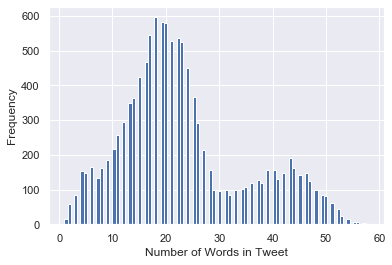

In [88]:
#Add a column to dataframe for the word count

AllTweets1['word_count'] = AllTweets1['tweet'].apply(lambda x: len(str(x).split(" ")))

print("Word Count Median: " + str(AllTweets1['word_count'].median()))
print(AllTweets1['word_count'].describe())

x = AllTweets1['word_count']
n_bins = 95

plt.hist(x, bins=n_bins)
plt.xlabel('Number of Words in Tweet')
plt.ylabel('Frequency')
plt.show()